In [1]:
# Standard imports.
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg.lapack as lapack

## Solve axisymmetric pipe flow (no-slip, steady)

In [2]:
def solve_pipe_poiseuille(R=1.0, n=201, G=1.0, nu=1.0):
    """
    Solve steady axisymmetric Poiseuille flow in a pipe:
        (1/r) d/dr ( r du/dr ) = -G/nu
    on r in [0, R] with:
        du/dr(0)=0  (symmetry)  -> enforced as u0 = u1
        u(R)=0      (no-slip)
    Returns: r, u
    """

    r = np.linspace(0.0, R, n)
    h = r[1] - r[0]

    A = np.zeros((n,n))
    b = np.zeros(n)

    # Centreline symmetry: u0 = u1
    A[0,0] = 1.0
    A[0,1] = -1.0
    b[0] = 0.0

    # Interior nodes 
    for i in range(1, n-1):
        ri = r[i]
        rip = ri + 0.5*h # r_{i+1/2}
        rim = ri - 0.5*h # r_{i-1/2}

        A[i,i-1] = rim / (ri*h*h)
        A[i,i] = -(rim + rip) / (ri*h*h)
        A[i, i+1] = rip / (ri*h*h)
        b[i] = -G/nu
    
    # No slip BC
    A[n-1, n-1] = 1.0
    b[n-1] = 0.0

    u = np.linalg.solve(A,b)
    return r, u

## Analytical solution + validation plot

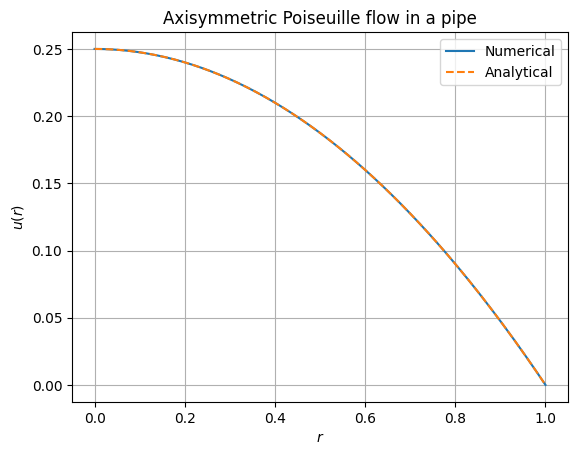

Max-norm error: 2.2906037057152107e-05


In [8]:
R = 1.0
G = 1.0
nu = 1.0

r, u_num = solve_pipe_poiseuille(R=R, n=200, G=G, nu=nu)

u_ana = G/(4*nu)*(R**2 - r**2)

plt.figure()
plt.plot(r, u_num, label="Numerical")
plt.plot(r, u_ana, "--", label = "Analytical")
plt.xlabel(r"$r$")
plt.ylabel(r"$u(r)$")
plt.title("Axisymmetric Poiseuille flow in a pipe")
plt.grid(True)
plt.legend()
plt.show()

err_inf = np.max(np.abs(u_num - u_ana))
print("Max-norm error:", err_inf)

## Volume flux

Flux in cylindrical coordinates is,

$$
Q = 2\pi \int_0^R u(r) r dr, \qquad Q_{\text{ana}} = \frac{\pi GR^4}{8 \nu}
$$

In [10]:
Q_num = 2*np.pi * np.trapezoid(u_num * r, r)
Q_ana = (np.pi*G*R**4)/(8*nu)

print("Q_num=", Q_num)
print("Q_ana =", Q_ana)
print("Relative error =", abs(Q_num-Q_ana)/abs(Q_ana))

Q_num= 0.3926842075634963
Q_ana = 0.39269908169872414
Relative error = 3.787667433161537e-05


## Implement Navier slip for channel flow

Instead of the no slip boundary conditions, apply

$$
l \frac{\partial u}{\partial y} = \pm u \quad \text{at} \, \, y = \mp W
$$